In [1]:
from argparse import ArgumentParser
from model.origgnn import MolecularGNN
from utils.package import plot_fit_confidence_bond
from pytorch_lightning import Trainer
import pytorch_lightning as pl
from collections import defaultdict
from torch.utils.data import DataLoader
from torch.utils.data import random_split
import torch
import numpy as np
import wandb
import time
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')

In [13]:
def main(hparams):
    
    dict_args = vars(hparams)
    model = MolecularGNN(**dict_args).load_from_checkpoint(checkpoint_path=hparams.checkpoint)
    trainer = Trainer.from_argparse_args(hparams)
    # trainer.tune(model)
    trainer.test(model, dataloaders=model.val_dataloader(), verbose=False)
    x = np.array(model.predictions['true'])
    y = np.array(model.predictions['pred'])
    val_r2 = r2_score(x, y)
    val_fig = plot_fit_confidence_bond(x, y, val_r2, annot=False)
    val_fig.savefig('val_fig.png')
    model.predictions = defaultdict(list)
    trainer.test(model, dataloaders=model.train_dataloader(), verbose=False)
    x = np.array(model.predictions['true'])
    y = np.array(model.predictions['pred'])
    id = np.array(model.predictions['id'])[(x > -4) & (x < -3)][:20]
    print(id)
    print(x[(x > -4) & (x < -3)][:20])
    train_r2 = r2_score(x, y)
    train_fig = plot_fit_confidence_bond(x, y, train_r2, annot=False)
    train_fig.savefig('train_fig.png')
def prepare_arg():
    parser = ArgumentParser()
    parser.add_argument("--dim", type=int, default=256)
    parser.add_argument("--layer_hidden",type=int, default=16)
    parser.add_argument("--layer_output",type=int, default=8)
    parser.add_argument("--batch_size",type=int, default=128)
    parser.add_argument("--data_path",type=str, default=None)
    parser.add_argument("--checkpoint",type=str, default=None)
    return parser

/home/huabei/anaconda3/envs/smtr/lib/python3.9/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

['in_man-54454_out' 'in_man-59895_out' 'in_man-53032_out'
 'in_man-54392_out' 'in_man-67817_out' 'in_man-29115_out'
 'in_man-49405_out' 'in_man-59608_out' 'in_man-25151_out'
 'in_man-2363_out' 'in_man-59505_out' 'in_man-48266_out'
 'in_man-44595_out' 'in_man-59093_out' 'in_man-58584_out'
 'in_man-83669_out' 'in_man-42200_out' 'in_man-57231_out'
 'in_man-32075_out' 'in_man-69364_out']
[-3.6 -3.2 -3.8 -3.2 -3.6 -3.1 -3.6 -3.6 -3.5 -3.5 -3.7 -3.7 -3.5 -3.8
 -3.9 -3.6 -3.5 -3.5 -3.2 -3.9]


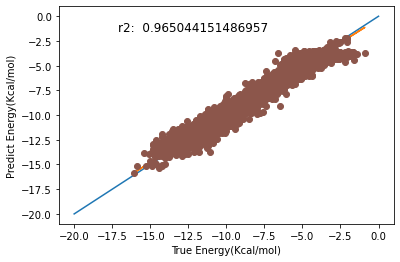

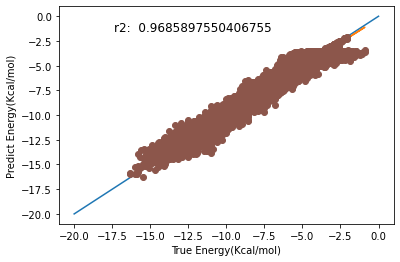

In [14]:
if __name__ == "__main__":
    # prepare args
    parser = prepare_arg()
    dataset_path = '/home/huabei/Projects/SMTarRNA/project/data/in_man_exhaustiveness_96_dock_conformation_1.txt'
    checkpoint = '/home/huabei/Projects/SMTarRNA/project/checkpoints/SMTarRNA-dim-256-hlayer-16-olayer-8-20220630_135942.ckpt'
    # add model args
    parser = MolecularGNN.add_model_specific_args(parent_parser=parser)
    # add Trainer args
    parser = Trainer.add_argparse_args(parser)
    args = parser.parse_args(['--data_path', dataset_path, '--checkpoint', checkpoint, '--gpus=1'])

    main(args)